In [14]:
import numpy as np
import numpy.typing as npt

import matplotlib.pyplot as plt

from typing import List
from scipy.interpolate import interp1d, lagrange

***This example is taken from Steven C. Chapra Raymond Canale. Numerical Methods For Engineers, 7 Ed. MC GRAW HILL INDIA. ISBN 9789352602131. Chapter 20 Case Studies: Curve Fitting, subchapter 20.4 analysis of experimental data (mechanical/aerospace engineering), example 20.6.***

Let's first load the data accompanying this exercise.

In [15]:
# Datapoints
x_points = np.array([0,0.5,1.0,1.5,2.0,2.5,3.0])
y_points = np.array([70,68,55,22,13,11,10])

dx = 0.001 # grid width
x_samples = np.arange(0, 3, dx)

In [16]:
kind='cubic'

interp_spline = interp1d(x = x_points, y =y_points, kind = kind)

y_interp_spline = interp_spline(x_samples)

In [4]:
def plot_results(y_points:npt.NDArray, y_interp:npt.NDArray, x_points: npt.NDArray, x_samples: npt.NDArray, title: str):
    """
    Helper function to plot results.

    Parameters:
    ----------
        y_points (npt.NDArray): y-values of knots
        y_interp (npt.NDArray): Interpolated values
        x_points (npt.NDArray): x-values of knots
        x_samples (npt.NDArray): gridpoints for plotting
        title (str): title of plot

    """

    plt.figure(figsize=(8, 5))
    
    plt.scatter(x_points, y_points, color="red", label="Known points")  # Highlight the input points
    plt.plot(x_samples, y_interp, label="Interpolating curve", linestyle="--")  # Spline curve
    plt.title(title)
    plt.xlabel("Depth [m]")
    plt.ylabel("Temperature [$^\circ$C]")
    plt.legend()
    plt.grid(True)
    plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
C:\Users\srupprecht\AppData\Local\Temp\ipykernel_11832\3788168986.py:21: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("Temperature [$^\circ$C]")


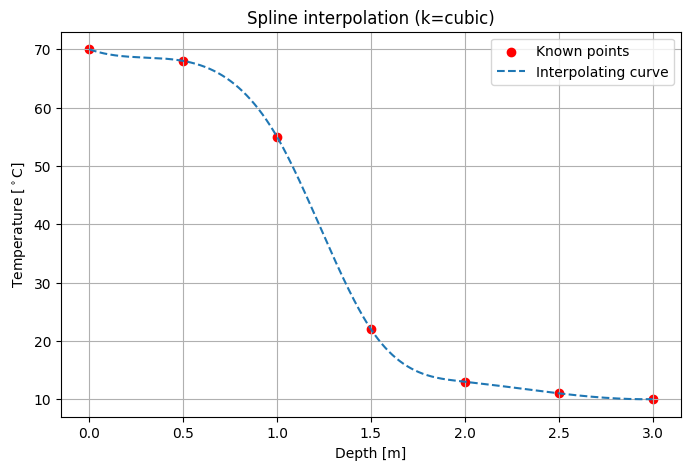

In [19]:
plot_results(y_points=y_points, y_interp = y_interp_spline, x_points=x_points, title=f"Spline interpolation (k={kind})", x_samples=x_samples)

In [6]:
# Compute point of inflection using central difference
def find_inflection_points(dx:float, y_values:npt.NDArray) -> List[int]:
    """
    Function returns indices of inflection points of interpolated values provided.
    The second order derivatives are approximated using the finite-difference method.

    Parameters:
    ----------
        dx (float): step size
        y_values (npt.NDArray): array of values

    Returns:
    --------
        inflection_idx (List[int]): indices of inflection points

    """

    inflection_idx = []
    val_second_der_prev = (y_values[0]-2*y_values[1]+y_values[2])/dx**2

    for idx in range(2, len(y_values)-1):
        # Compute second-order derivative using finite differences
        val_second_der = (y_values[idx-1]-2*y_values[idx]+y_values[idx+1])/dx**2
        # detect sign changes
        if (val_second_der_prev * val_second_der) < 0:
            inflection_idx.append(idx)
        val_second_der_prev = val_second_der

    return inflection_idx

def find_steepest_grad(dx:float, y_values:npt.NDArray, inflection_indices:List[int]) -> int:
    """
    Find inflection point at which the gradient is the steepest

    Parameters:
    ----------
        dx (float): step size
        y_values (npt.NDArray): array of values
        inflection_indices (List[int]): indices of inflection points
        
    Returns:
    -------
        int: index of inflection point with steepest gradient
    """
    ders = []
    for idx in inflection_indices:
        ders.append(abs(y_values[idx]-y_values[idx-1])/dx)
    return inflection_indices[np.argmax(ders)]

In [18]:
inflection_indices = find_inflection_points(dx, y_interp_spline)
thermocline_depth = find_steepest_grad(dx, y_interp_spline, inflection_indices)
print(f"The thermocline is at {x_samples[thermocline_depth]} metres.")

The thermocline is at 1.229 metres.


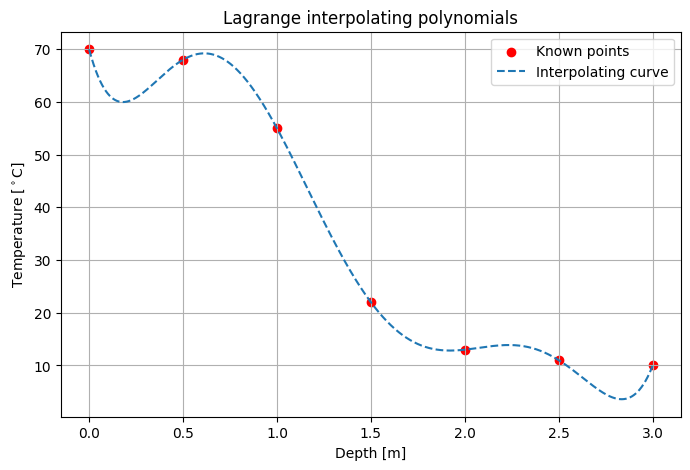

In [ ]:
poly = lagrange(x_points, y_points)
y_interp_lagrange = poly(x_samples)
plot_results(y_points=y_points, y_interp = y_interp_lagrange, x_points=x_points, title="Lagrange interpolating polynomials", x_samples=x_samples)

In [20]:
inflection_indices_lagrange = find_inflection_points(dx, y_interp_lagrange)
thermocline_depth_lagrange = find_steepest_grad(dx, y_interp_lagrange, inflection_indices_lagrange)
print(f"The thermocline is at {x_samples[thermocline_depth_lagrange]} metres using Lagrange interpolating polynomials.")

The thermocline is at 1.161 metres using Lagrange interpolating polynomials.
